## Loan Data Analysis and Exploration

In this project, I will analyze loan data obtained from Prosper (More information about below) and endeavour to asnwer the following questions with the outcome of my analysis.

> What factors affect a loan’s outcome status?
> What affects the borrower’s APR or interest rate?
> Are there differences between loans depending on how large the original loan amount was?

<a id='contents_table'></a>

## Table of Contents
- [Introduction](#intro)
- [Part I - Preliminary Wrangling](#preliminary_wrangling)
- [Part II - Univariate](#Univariate)
- [Part III - Bivariate](#Bivariate)
- [Part IV - Multivariate](#Multivariate)


<a id='intro'></a>

### Introduction

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. This data dictionary explains the variables in the data set. You are not expected to explore all of the variables in the dataset! Focus your exploration on about 10-15 of them.

### About Us on Company Website

Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated more than $17 billion in loans to more than 1,010,000 people.

Through Prosper, people can invest in each other in a way that is financially and socially rewarding. Borrowers apply online for a fixed-rate, fixed-term loan between $2,000 and $40,000. Individuals and institutions can invest in the loans and earn attractive returns. Prosper handles all loan servicing on behalf of the matched borrowers and investors.

Prosper Marketplace is backed by leading investors including Sequoia Capital, Francisco Partners, Institutional Venture Partners, and Credit Suisse NEXT Fund.

### Goals of Data Exploration

In this project, the goals of exploring this dataset can be summarized into the following three parts:

1. Find the distribution of investors.
2. Find the yearly progression of the borrower rates of loans
3. Find the relationship between borrower rate of loans, prosper ratings and customers who are home owners

[Back to Table of Contents](#contents_table)

<a id='preliminary_wrangling'></a>
## 1. Loan Data Wrangling

The first part of this project is the preliminary wrangling and it consists of the follwoing 3 steps - Gatherring, Assessing and Cleaning.

### Selected Variables from Dataset

There are 113937 records/rows along with 81 variables/columns in this dataset. Each of the 81 variables are clearly listed in the section above. They include the following  categorical variables which i find to be most helpful in achieving the outcome of this analysis.


1. Investors ---- The number of investors that funded the loan.
2. BorrowerRate ---- interest rate of the loan.
3. ProsperRatings (numeric) ---- The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.
4. IsBorrowerHomeOwner ---- whether the borrower is a homeowner or not.



### 1.1 Gathering

In this step, I'll be gathering required data by manually downloading datasets from the source. Thankfully, we were provided  with a link to a .csv by Udacity for this purpose.

Additionally, I will be isolating my dataset to ensure that I focus only on variables that will greatly influence the goals of this project.

[Back to Table of Contents](#contents_table)

In [159]:
# importing all dependencies and configuring inline plots with matplotlib

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [160]:
# loading downloaded data into dataframe

loans = pd.read_csv('prosperLoanData.csv')

### 1.2 Assessing

In this step, I'll be programmatically assessing data. Here, I'll clearly define the following aspects of our dataset:


[Back to Table of Contents](#contents_table)

In [161]:
# viewing the first 5 rows of our data helps to see what we are dealing with.
# also viewing number of rows and columns present.

print ('The number of rows and columns is', loans.shape)
loans.head()

The number of rows and columns is (113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [162]:
# creating a dataframe with the abovementioned 6 variables

loans_mark2 = loans[['BorrowerRate', 'IsBorrowerHomeowner',
                   'Investors', 'ProsperRating (numeric)']].copy()

In [163]:
# viewing additional information about our dataset 
# helps us to assess it effectively

loans_mark2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 4 columns):
BorrowerRate               113937 non-null float64
IsBorrowerHomeowner        113937 non-null bool
Investors                  113937 non-null int64
ProsperRating (numeric)    84853 non-null float64
dtypes: bool(1), float64(2), int64(1)
memory usage: 2.7 MB


#### 1.2.1 Quality Issues WIth Our dataset?

1. Space in the column name 'ProsperRating (numeric)'

2. ProsperRating has missing values.



### 1.3 Cleaning

In this step I'll be addressing the data quality issues in our dataset. For each issue we'll be adopting three key steps to clean our data:

- Define - here, I'll define the problem
- Code - here, I'll write and execute the code to solve the problem
- Test - here, I'll test to see if the code has given the desired results

Let's get started!

[Back to Table of Contents](#contents_table)

In [164]:
# first, we create a copy of our dataframe 
    # this is prevents us from making irreversable changes to our dataset
# next, we perform data cleaning on this newly created dataframe

loans_clean = loans_mark2.copy()

### 1.3.1 Solving Issue 1: Removing space in the column 'ProsperRating' column

#### Define 
Use pandas rename() function to remove the 'numeric' in the column name

#### Code

In [165]:
# removing space from column name using the panda rename function
# I prefer the name Rating in lowercase than ProsperRating. 
# So, I'll see to that too with the code below

loans_clean.rename(columns = {'ProsperRating (numeric)' : 'rating'}, inplace =True)

In [166]:
# I also prefer that all column names begin with small letters
# therefore, I'll change the remaining column names using the following code

loans_clean.rename(columns = {'BorrowerRate':'borrowrate','IsBorrowerHomeowner':'isborrowerhomeowner',
                   'Investors':'investors'}, inplace = True);

#### Test

In [167]:
# testing whether column name has been modified like we wanted

loans_clean.info()

# result is perfect! Exactly how we want.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 4 columns):
borrowrate             113937 non-null float64
isborrowerhomeowner    113937 non-null bool
investors              113937 non-null int64
rating                 84853 non-null float64
dtypes: bool(1), float64(2), int64(1)
memory usage: 2.7 MB


### 1.3.2  Solving Issue 2: Missing values in ProsperRating column

#### Define 
Use pandas na() and fillna() functions to remedy all missing values where necessary

#### Code

In [168]:
# check for missing values in rating (ProsperRating) column

loans_clean['rating'].isnull().sum()

29084

> There are 29,000+ missing values in the 'rating' (ProsperRating) column. To deal with this issue, I'll be filling the missing records with mean of the values around them.

In [169]:
# filling missing values with mean using the fillna() function

loans_clean['rating'].fillna(loans_clean['rating'].mean());

# to ensure our result is permanent, I invoke the inplace=True keyword

loans_clean['rating'].fillna(loans_clean['rating'].mean(), inplace=True)

#### Test

In [170]:
# checking to see if the code worked

print(loans_clean.info())

print (' ')

loans_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 4 columns):
borrowrate             113937 non-null float64
isborrowerhomeowner    113937 non-null bool
investors              113937 non-null int64
rating                 113937 non-null float64
dtypes: bool(1), float64(2), int64(1)
memory usage: 2.7 MB
None
 


,borrowrate,isborrowerhomeowner,investors,rating
0,0.1580,True,258,4.072243
1,0.0920,False,1,6.000000
2,0.2750,False,41,4.072243
3,0.0974,True,158,6.000000
4,0.2085,True,20,3.000000


> We can see that the info above shows the 'rating' column now has an equal number of values with other variables.

In [171]:
# storing the cleaned Dataframe

loans_clean.to_csv('loans_clean.csv', index=False)

<a id='Univariate'></a>

## 2. Univariate Exploration



### 2.1 Exploring Distributions of Investors for Prosper loans

[Back to Table of Contents](#contents_table)

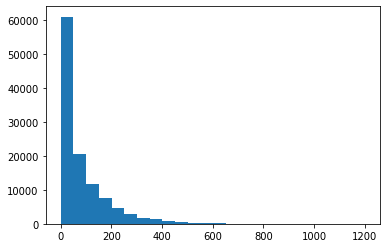

In [172]:
# defining bin size of our distrbution

bin_width = 50
bin_edges = np.arange(loans_clean['investors'].min(), 
                         loans_clean['investors'].max() + bin_width,
                         bin_width)


# plot histogram for Borrowerrate

plt.hist(data = loans_clean, x = 'investors', bins = bin_edges)
plt.xlabel = ('investors')
plt.ylabel = ('Count')

#### Insights

The right-skewed, uni-modal distribution of investors above points to the fact that majority of loan packages that are offered to customers have less than 200 investors. Too confirm this assumption, we'll use the describe() function to check the basic statistics of our data frame.


In [173]:
# checking statistics of our data frame
loans_clean.describe()

,borrowrate,investors,rating
count,113937.000000,113937.000000,113937.000000
mean,0.192764,80.475228,4.072243
std,0.074818,103.239020,1.443961
min,0.000000,1.000000,1.000000
25%,0.134000,2.000000,3.000000
50%,0.184000,44.000000,4.072243
75%,0.250000,115.000000,5.000000
max,0.497500,1189.000000,7.000000


> The statistics above confirms that 75% of loan packages offered have only 82 investors. We can hereby confidently say that the majority of loans offered to customers are not heavily-backed by investors.

### 2.2 Exploring Distribution of Loan Ratings

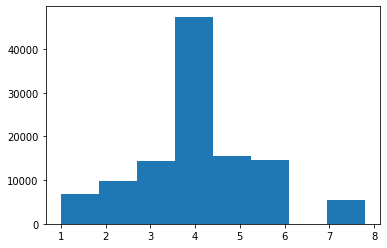

In [174]:
# defining bin size of our distrbution

bin_width = 0.85
bin_edges = np.arange(loans_clean['rating'].min(), 
                         loans_clean['rating'].max() + bin_width,
                         bin_width)


# plot histogram for Borrowerrate

plt.hist(data = loans_clean, x = 'rating', bins = bin_edges)
plt.xlabel = ('Rating')
plt.ylabel = ('Count')


#### Insights

The above histogram of prosper loan ratings shows a normal and unimodal distribution. It is clear that the vast majority of borrowers have  4.0 or a 'C' prosper loan rating.

<a id='Bivariate'></a>
## 3. Bivariate Exploration

### 3.1 Exploring Annual Trends of BorrowerRate of Prosper Loans

[Back to Table of Contents](#contents_table)


I realized we did not include any variable that has time data in it. To remedy this issue, first, we need to introduce the 'LoanOriginationDate' and other relevant columns into our data frame, then we isolate the 'year' sub-section of the datetime data type.



In [175]:
# introducing new variables column into a new Dataframe

loans_clean2 = loans[['LoanOriginationDate', 'ListingCreationDate', 
                      'BorrowerRate', 'IsBorrowerHomeowner',
                   'Investors', 'ProsperRating (numeric)']].copy()

# removing space from Prosperrating column name
loans_clean2.rename(columns = {'ProsperRating (numeric)' : 'Rating'}, inplace=True)

In [176]:
loans_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 6 columns):
LoanOriginationDate    113937 non-null object
ListingCreationDate    113937 non-null object
BorrowerRate           113937 non-null float64
IsBorrowerHomeowner    113937 non-null bool
Investors              113937 non-null int64
Rating                 84853 non-null float64
dtypes: bool(1), float64(2), int64(1), object(2)
memory usage: 4.5+ MB


In [177]:
# next we extract the year from the LoanOriginationDate 
# and we also create a separate column for year data
loans_clean2['year_loan'] = loans_clean2.LoanOriginationDate.str.split('-').str[0]

In [178]:
# checking to confirm our column has been created
loans_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 7 columns):
LoanOriginationDate    113937 non-null object
ListingCreationDate    113937 non-null object
BorrowerRate           113937 non-null float64
IsBorrowerHomeowner    113937 non-null bool
Investors              113937 non-null int64
Rating                 84853 non-null float64
year_loan              113937 non-null object
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 5.3+ MB


In [179]:
# checking all values in our year column

print(loans_clean2.year_loan.value_counts())

2013    34345
2012    19553
2014    12172
2008    11552
2007    11460
2011    11228
2006     5906
2010     5652
2009     2047
2005       22
Name: year_loan, dtype: int64


In [192]:
# saving the new dataframe to csv
loans_clean2.to_csv('loans_clean2.csv', index=False);

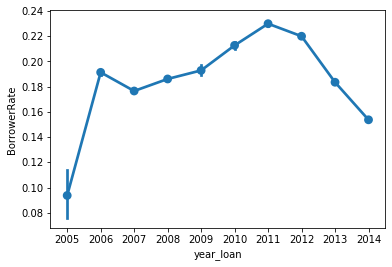

In [180]:
# plotting a point plot for BorrowerRate against Year data

sb.pointplot(data = loans_clean2, x = 'year_loan', y = 'BorrowerRate')

plt.xlabel = ('Loan Year')
plt.ylabel = ('BorrowerRate')

#### Insights

As expected, we see a sharp reduction in lending activity arounf 2007/2008 during the global economic recession. Afterwards, the lending instry has experienced a rebound and so far, Prosper has seen its highest lending activity in 2011. 

Prospers success in 2011 may have been a signal to other startups that the lending industry was ready for distruption. Therefore, we see Prosper's lending activity experienced a steady decline from 2012 to 2014 - this is probably due to stiff competition in the lending industry. However, there is room for growth as the industry is still burgeoning.



Let's proceed to compare data the ListingCreationDate with BorrowerRate and see what insights we could from this relationship and that of LoanOriginationDate vs. BorrowerRate

In [181]:
# first we extract the year from the ListingCreationDate 
# then we also create a separate column for year data
loans_clean2['year_list'] = loans_clean2.ListingCreationDate.str.split('-').str[0]

In [182]:
# checking to confirm our column has been created
loans_clean2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 8 columns):
LoanOriginationDate    113937 non-null object
ListingCreationDate    113937 non-null object
BorrowerRate           113937 non-null float64
IsBorrowerHomeowner    113937 non-null bool
Investors              113937 non-null int64
Rating                 84853 non-null float64
year_loan              113937 non-null object
year_list              113937 non-null object
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 6.2+ MB


In [183]:
# checking all values in our year column

print(loans_clean2.year_list.value_counts())

2013    35413
2012    19556
2007    11557
2011    11442
2008    11263
2014    10734
2006     6213
2010     5530
2009     2206
2005       23
Name: year_list, dtype: int64


In [184]:
# setting plot color parameter to a default

plot_color = sb.color_palette()[0]

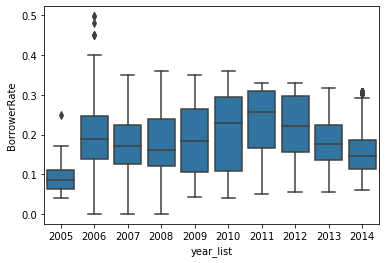

In [185]:
# plotting a point plot for BorrowerRate against Year data

sb.boxplot(data = loans_clean2, x = 'year_list', y = 'BorrowerRate', 
           color = plot_color)

plt.xlabel = ('Listing Year')
plt.ylabel = ('BorrowerRate')

#### Insights

The above boxplot reveals a similar trend in annual performance of Prosper's Loan offereings as we saw in the point plot comparing Loan_yea and Borrower Rate. It's safe to say, our assumptions may be correct.

<a id='Multivariate'></a>

## 4.0 Mulivariate Exploration

[Back to Table of Contents](#contents_table)

### 4.1 Exploring Relationship between BorrowerRate, ProsperRatings and Home-Owning Customers

The broader perspective for this exploration is to know answer the following question: Do property owners get a better rating and premiums than non-property owners? 

Let's find out by using a multivariate analysis of the 3 variables: ratings, isborrowerhomeowner and borrowerrate

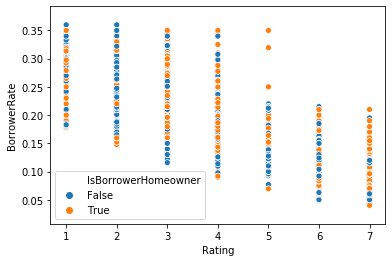

In [186]:
# plotting a boxplot to explore all 3 variables

#sb.boxplot(data = loans_clean2, x = 'Rating', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner');

# customizing width and height of plot

dim = sb.scatterplot(data = loans_clean2, x = 'Rating', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner');
dim.figure.set_figwidth(6)
dim.figure.set_figheight(4)

#### Insights

The plot above shows that the majority of non-home owners get a 2.0 rating. We can also see there are fewer non-home owners with a 7.0 Prosper Rating - this suggests that owning a property may incrase the chances of getting a higher Prosper Rating therefore making a customer more eligible for a better loan offering.

In [187]:
loans_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 8 columns):
LoanOriginationDate    113937 non-null object
ListingCreationDate    113937 non-null object
BorrowerRate           113937 non-null float64
IsBorrowerHomeowner    113937 non-null bool
Investors              113937 non-null int64
Rating                 84853 non-null float64
year_loan              113937 non-null object
year_list              113937 non-null object
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 6.2+ MB


### 4.2 Exploring Yearly Trend in Prosper BorrowerRate for Home Owners versus Non-Home Owners

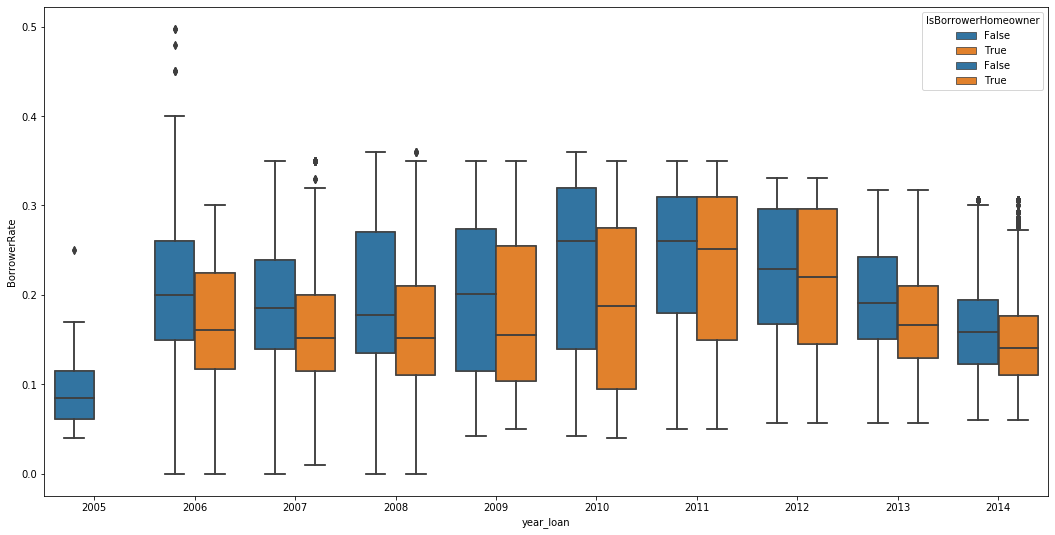

In [188]:
# plotting a boxplot to explore all 3 variables

sb.boxplot(data = loans_clean2, x = 'year_loan', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner');

# customizing width and height of plot

dim = sb.boxplot(data = loans_clean2, x = 'year_loan', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner');
dim.figure.set_figwidth(18)
dim.figure.set_figheight(9)

#### Insights

The plot above, we can see that the median premium(BorrowerRate) for home-owning customers is always lesser than the counterpart for each year that passes. It seems that the increase in premiums is a way for lenders to hedge the risks involved in lending to non-home owners. 

We can also infer from the plot that the greatest difference in premiums was evident between 2008 and 2010. This suggests that the bigger gap in premiums betwen Home owners and Non-Home owners may have been a coping mecahnism for Prosper to endure the 2008 financial crises and the few years that came after 2008